# KNN (K Nearest Neighbor) Algorithm
The abbreviation KNN stands for “K-Nearest Neighbor”. It is a supervised machine learning algorithm.
The algorithm can be used to solve both classification and regression problem statements. 
The number of nearest neighbours to a new unknown variable that has to be predicted or classified is denoted by
the symbol 'K'.

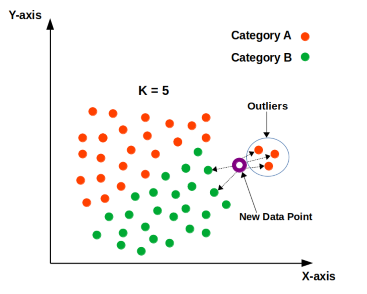

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv(  "C:\\Users\\hp\\Desktop\\CG  data science files\\iris.csv", names=['f1', 'f2', 'g1', 'g2', 'class'])
df

,f1,f2,g1,g2,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.head()

,f1,f2,g1,g2,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      150 non-null    float64
 1   f2      150 non-null    float64
 2   g1      150 non-null    float64
 3   g2      150 non-null    float64
 4   class   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
features = df.iloc[:, :-1].values
labels   = df.iloc[:, -1].values

In [8]:
features,labels

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [9]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.3)

In [17]:
X_train, X_test, Y_train, Y_test

(array([[4.8, 3.4, 1.6, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [6. , 2.9, 4.5, 1.5],
        [5. , 3.2, 1.2, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [7.7, 3. , 6.1, 2.3],
        [4.4, 3. , 1.3, 0.2],
        [5.1, 3.8, 1.5, 0.3],
        [6.5, 3. , 5.2, 2. ],
        [7.7, 2.8, 6.7, 2. ],
        [4.6, 3.6, 1. , 0.2],
        [6. , 3. , 4.8, 1.8],
        [6.1, 2.8, 4.7, 1.2],
        [5.7, 4.4, 1.5, 0.4],
        [7.6, 3. , 6.6, 2.1],
        [5.2, 2.7, 3.9, 1.4],
        [6.7, 3.1, 5.6, 2.4],
        [5.1, 3.5, 1.4, 0.3],
        [5. , 3.5, 1.6, 0.6],
        [5.4, 3.9, 1.3, 0.4],
        [4.9, 2.5, 4.5, 1.7],
        [6.4, 3.1, 5.5, 1.8],
        [6.6, 2.9, 4.6, 1.3],
        [6. , 2.2, 4. , 1. ],
        [4.9, 3.1, 1.5, 0.1],
        [6.4, 2.8, 5.6, 2.1],
        [6.9, 3.2, 5.7, 2.3],
        [6.7, 3. , 5.2, 2.3],
        [7.2, 3.6, 6.1, 2.5],
        [5.7, 3. , 4.2, 1.2],
        [6.4, 2.8, 5.6, 2.2],
        [6.2, 2.2, 4.5, 1.5],
        [5. , 3.4, 1.6, 0.4],
        [5

In [25]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [29]:
y_pred = knn.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

# accuracy_score

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9777777777777777

# classification_report

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, Y_test))

                 precision    recall  f1-score   support

    Iris-setosa       0.43      0.43      0.43        14
Iris-versicolor       0.57      0.53      0.55        15
 Iris-virginica       0.41      0.44      0.42        16

       accuracy                           0.47        45
      macro avg       0.47      0.47      0.47        45
   weighted avg       0.47      0.47      0.47        45



# data visualization using matplotlib & seaborn

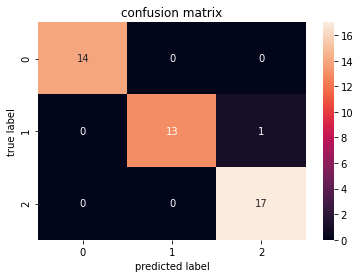

In [31]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_test, y_pred)
sb.heatmap(conf_mat,annot=True)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('confusion matrix')
plt.show()

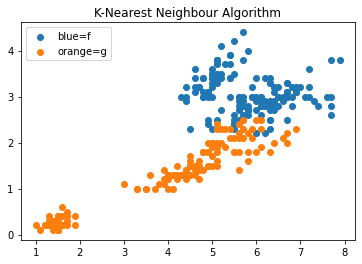

In [29]:
import matplotlib
from matplotlib import pyplot as plt


x_val =  df['f1']
y_val =  df['f2']
x1_val = df['g1']
y1_val=  df['g2']
plt.scatter(x_val,y_val,label='blue=f')         # for original values
plt.scatter(x1_val,y1_val,label='orange=g')     # for predicted values
plt.title("K-Nearest Neighbour Algorithm")
plt.legend()
plt.show()